In [6]:
from array import array
import math
import random

In [7]:
ichoice = 1

random.seed(1)

n = 16000
nwaves = 1000
pi = math.pi
lmbda = 1.0
xlow = -24.0*lmbda
dx = 48.0*lmbda/n
k=2.0*pi/lmbda
delta_k = 0.05*k

x = array('d')
y = array('d')
yf = array('d')

sim_integral = 0.0
theory_integral = 0.0
ytemp = 0.0
for i in range(0,n):
    x.append(xlow+i*dx+.0000001)
    for j in range(0,nwaves):
        offset = random.gauss(0,delta_k)
        ytemp = ytemp + math.sin((k+offset)*x[i])
    ytemp = 1.0/(nwaves)*ytemp
    y.append(ytemp*ytemp)
    yf.append(math.sqrt(2.0/(pi*delta_k))*math.sin(k*x[i])*math.sin(delta_k*x[i])/x[i])
    yf[i]=yf[i]*yf[i]
    sim_integral += y[i]*dx
    theory_integral += yf[i]*dx
    
ymax = max(y)
ycrit = ymax/2.0

delta_x_theory = 2.0/(delta_k)

for i in range(n):
    if (y[i] > ycrit):
        xstart = x[i]
        break
for i in range(n-1,0,-1):
    if (y[i] > ycrit):
        xend = x[i]
        break

print(delta_x_theory,xend-xstart)
    
    
print ("Sim integral = %f" % sim_integral)
print ("Theory integral = %f" % theory_integral)


6.366197723675814 5.475000000000001
Sim integral = 2.847244
Theory integral = 0.955889


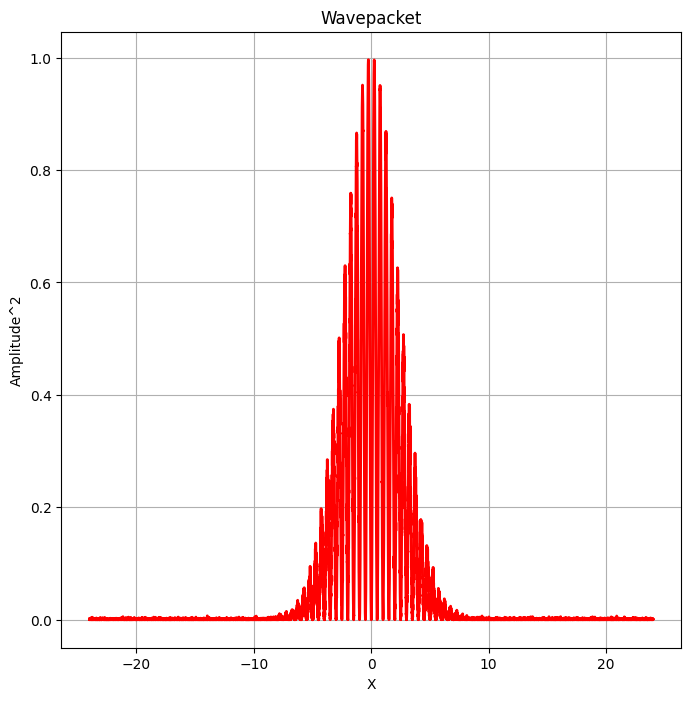

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axes
fig, axs = plt.subplots(1, 1, figsize=(8, 8), sharex=True)

# Set grid lines
axs.grid(True)

# Plot the first graph
axs.plot(x, y, color='red', linestyle='-', linewidth=2)

# Set title and labels for the first graph
axs.set_title('Wavepacket')
axs.set_ylabel('Amplitude^2')

# Plot the second graph if ichoice > 1
if ichoice > 1:
    axs.plot(x, yf, color='blue', linestyle='-', linewidth=2)
    axs.set_ylabel('Amplitude^2')

# Hide x-axis tick labels for the second and third graphs
axs.tick_params(axis='x', labelbottom=True)

# Set title and labels for the third graph
axs.set_xlabel('X')
axs.set_ylabel('Amplitude^2')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Show the plot
plt.show()
